<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World_Happiness_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dataset from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

# Define paths
drive_path = "/content/drive/My Drive/kaggle.json"
kaggle_path = "/root/.kaggle/kaggle.json"

# Create .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Copy the kaggle.json file
shutil.copy(drive_path, kaggle_path)

# Set the correct permissions
os.chmod(kaggle_path, 600)


In [3]:
!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 58.7MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### User Input Columns

In [5]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

selected_df = pd.DataFrame()
# Create multi-select widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.columns,
    value=[df.columns[0]],  # Default selection
    description='Select Columns:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(
        width='70%',  # Set width
        height='auto',  # Set height
        border='2px solid black',  # Border style
        padding='10px',  # Padding inside box
        margin='20px auto',  # Margin around box
    )
)

# Output widget to display the selected columns
output = widgets.Output()

def show_selected_columns(change):
    with output:
        output.clear_output()  # Clear previous output
        selected_columns = list(column_selector.value)  # Get selected columns

        if selected_columns:
            print()
            display(df[selected_columns].head())  # Show first 5 rows
        else:
            print("⚠️ No columns selected!")

# Attach the function to update on selection
column_selector.observe(show_selected_columns, names='value')

# Button to save the selected columns

def save_selected_columns(b):
    selected_columns = list(column_selector.value)

    if not selected_columns:
        print("⚠️ Please select at least one column!")
        return
    global selected_df
    # selected_df = pd.concat([df[selected_columns],selected_df], axis=1)
    selected_df = df[selected_columns]
    # print()
    # print()
    # print(selected_df.head())
    print("✅ Saved selected columns to \"selected_df\" dataframe!")




save_button = widgets.Button(
    description="💾 Save Selected Columns",
    button_style="info",  # 'success' = Green, 'info' = Blue, 'warning' = Orange, 'danger' = Red
    tooltip="Click to save selected columns",
    icon="check",  # Adds a checkmark icon
    layout=widgets.Layout(width='250px', height='40px'),  # Adjust button size
    margin='20px auto',  # Margin around box
)
print()
# save_button = widgets.Button(description="Confirm Selection")
save_button.on_click(save_selected_columns)
print()
print()
# Display everything
display(column_selector, output, save_button)


NameError: name 'df' is not defined

### Categorizing the Countries

In [19]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2015


In [20]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
possible_column_names = ['Country', 'Country or region', 'Country name']

In [21]:
# Function to check, extract and delete the column
def extract_and_delete_column(df, possible_column_names):
    for name in possible_column_names:
        if name in df.columns:
            extracted_column = df[name]  # Extract column
            df.drop(name, axis=1, inplace=True)  # Delete the column from df
            print(f"✅ Column '{name}' extracted and deleted from df.")
            return extracted_column
    print(f"⚠️ Column not found from: {possible_column_names}")
    return None

final_df = extract_and_delete_column(df, possible_column_names)
final_df = pd.DataFrame(final_df)

split_size = len(final_df) // 3
categories = ['Strong Happy'] * split_size + ['Moderate Happy'] * split_size + ['Weak Happy'] * (len(final_df) - 2 * split_size)
final_df['Category'] = categories

final_df
# selected_df = pd.DataFrame()
# # Check result
# if extracted_column is not None:
#     print("Extracted column:")
#     print(extracted_column)

# # Display the updated DataFrame
# print("\nUpdated DataFrame after deletion:")
# print(df)

✅ Column 'Country' extracted and deleted from df.


,Country,Category
0,Switzerland,Strong Happy
1,Iceland,Strong Happy
2,Denmark,Strong Happy
3,Norway,Strong Happy
4,Canada,Strong Happy
...,...,...
153,Rwanda,Weak Happy
154,Benin,Weak Happy
155,Syria,Weak Happy
156,Burundi,Weak Happy


### Data Processing


In [22]:
if(year=="2015"):
  df.drop("Region", axis=1, inplace=True)
  df.drop("Happiness Rank", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})

if(year=="2018"):
  df.drop("Overall rank", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})

if(year=="2020"):
  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]


In [ ]:
df

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

### Categorizing the features

In [23]:
# Number of bins/Categories you want
n_bins = 3
category_labels = ['Low', 'Medium', 'High']
# Create equal-width bins for each column
for column in df.columns:
    min_val = df[column].min()- 1e-3  # Minimum value
    max_val = df[column].max()  # Maximum value
    bins = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]
    df[column] = pd.cut(df[column], bins=bins, labels=category_labels)

print(df)


    Happiness Score Economy  Family  Health Freedom   Trust Generosity
0              High    High    High    High    High    High     Medium
1              High    High    High    High    High     Low     Medium
2              High    High    High    High    High    High     Medium
3              High    High    High    High    High  Medium     Medium
4              High    High    High    High    High  Medium     Medium
..              ...     ...     ...     ...     ...     ...        ...
153             Low     Low  Medium  Medium    High    High        Low
154             Low     Low     Low     Low    High     Low        Low
155             Low  Medium  Medium    High     Low  Medium     Medium
156             Low     Low     Low     Low     Low     Low        Low
157             Low     Low     Low     Low  Medium     Low        Low

[158 rows x 7 columns]


In [24]:
final_df.drop(final_df.columns[0], axis=1, inplace=True)
df= pd.concat([df, final_df], axis=1)
df

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Category
0,High,High,High,High,High,High,Medium,Strong Happy
1,High,High,High,High,High,Low,Medium,Strong Happy
2,High,High,High,High,High,High,Medium,Strong Happy
3,High,High,High,High,High,Medium,Medium,Strong Happy
4,High,High,High,High,High,Medium,Medium,Strong Happy
...,...,...,...,...,...,...,...,...
153,Low,Low,Medium,Medium,High,High,Low,Weak Happy
154,Low,Low,Low,Low,High,Low,Low,Weak Happy
155,Low,Medium,Medium,High,Low,Medium,Medium,Weak Happy
156,Low,Low,Low,Low,Low,Low,Low,Weak Happy


Accuracy: 75.00%


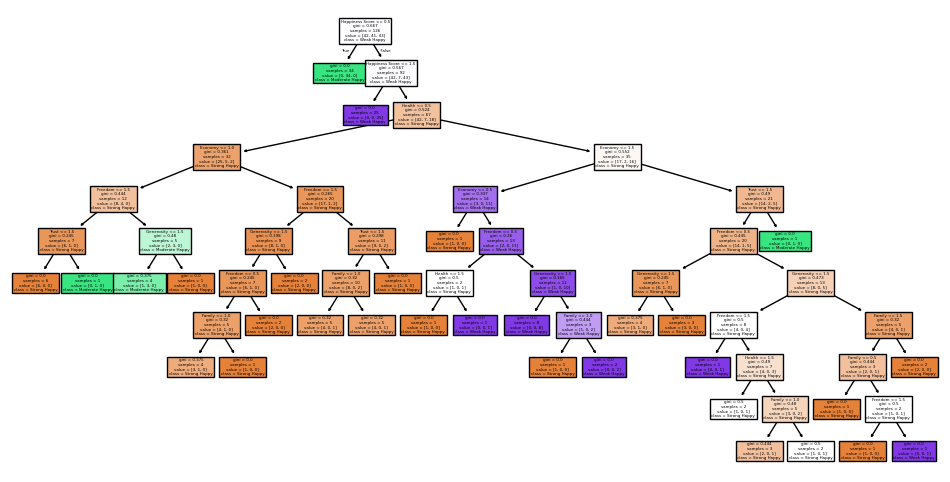

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Encode categorical values to numerical values (Low->0, High->2)
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

# Split features and target
X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred= tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['Strong Happy', 'Moderate Happy', 'Weak Happy'], filled=True)
plt.show()
